# 기계학습

### 담당교수 : 장원중

In [49]:
# 그래프 한글이 깨질때 & 마이너스 부호 사용

import sys, os
from matplotlib import font_manager, rc 
import matplotlib.pyplot as plt

# 한글 폰트 설정 : 윈도우 폰트를 사용하는 경우 
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name) 

# 운영체제별 한글 폰트 설정
# if os.name == 'posix': # Mac 환경 폰트 설정
#     rc('font', family='AppleGothic')
# elif os.name == 'nt': # Windows 환경 폰트 설정
#     rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 유니코드에서 음수 부호설정
rc('axes', unicode_minus=False)

# 부모 디렉터리의 파일을 가져올 수 있도록 설정
sys.path.append(os.pardir)     

# jupyter에서 matplotlib 그래프를 출력 영역에 표시  
%matplotlib inline 

# 레티나 설정 - 폰트 주변이 흐릿하게 보이는 것을 방지해 글씨가 좀 더 선명하게 보임
%config InlineBackend.figure_format = 'retina'

In [2]:
# 운영체제별 이름 

import platform

platform.system()

'Windows'

In [3]:
# 파이썬 버전 확인

import sys
import platform

print("--sys.version—")
print(sys.version)

print("--python_version—")
print(platform.python_version())

--sys.version—
3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
--python_version—
3.11.7


# 비선형 변수 변환

In [22]:
import numpy as np 
import math

print(np.log10(10))         # 로그 10 
print(np.log10(100))        # 로그 100

print(math.sqrt(10))        # 루트 10 
print(math.sqrt(100))       # 루트 100

print(np.reciprocal(10.0))  # 역수 10
print(np.reciprocal(100.0)) # 역수 100

print(10**2)                # 제곱 10**2   
print(10**4)                # 제곱 10**4 

1.0
2.0
3.1622776601683795
10.0
0.1
0.01
100
10000


In [47]:
import numpy as np 
import math

print(np.log10(1/10))         # 로그 1/10 
print(np.log10(1/100))        # 로그 1/100

-1.0
-2.0


## 로그 변환 (Log Transformation) with np.log1p  

In [24]:
# 라이브러리 읽어오기 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [48]:
# 데이터 읽어오기 
sample_data = pd.read_csv(os.getcwd()+'/student90.csv')

# 데이터의 형상 
# - shape 속성 : 데이터의 (행, 열) 크기를 확인 
print(sample_data.shape)   # (90, 4)
sample_data[:10]      # 10행 출력 

(90, 4)


,no,sex,weight_kg,height_cm
0,1,m,98,198
1,2,m,77,170
2,3,m,70,170
3,4,m,90,198
4,5,m,71,170
5,6,m,70,165
6,7,m,73,193
7,8,m,59,142
8,9,m,68,137
9,10,m,86,155


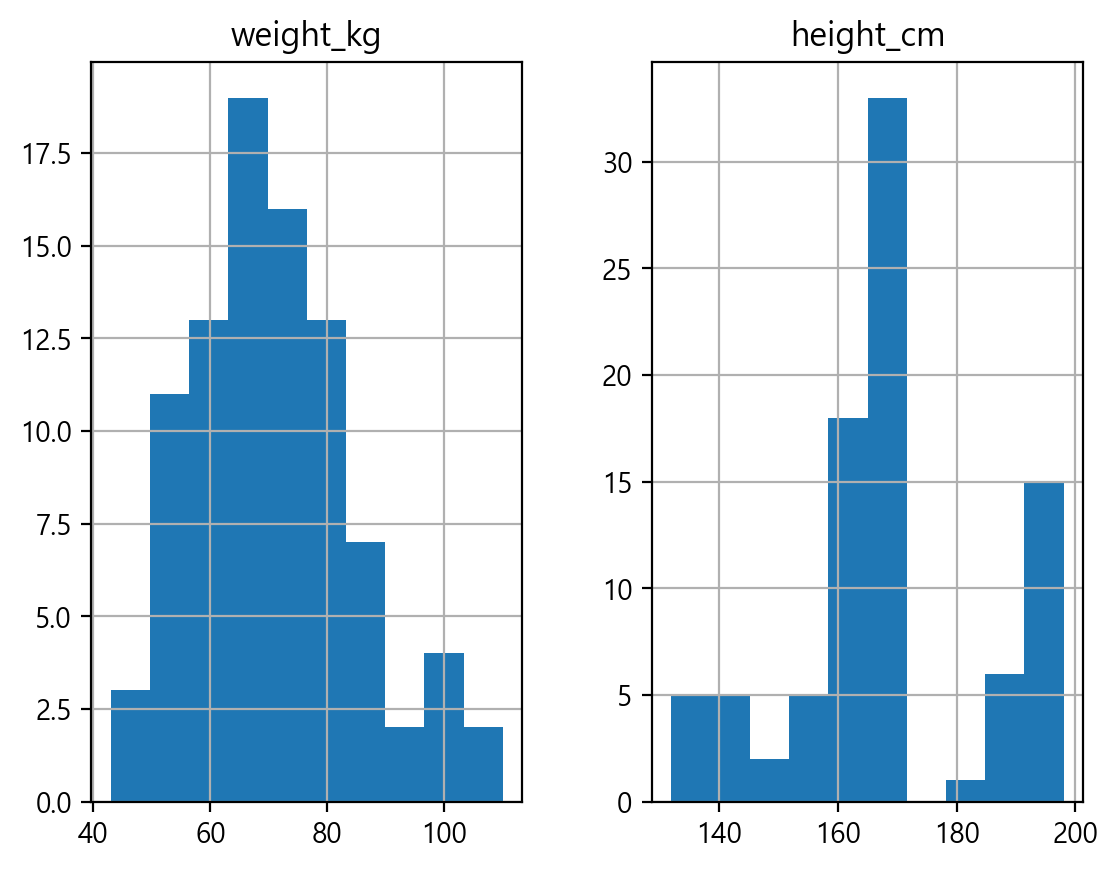

In [31]:
#  키와 몸무게 데이터 세트 
# - 히스토 그램 그리기  

pd.DataFrame(sample_data, columns=['weight_kg','height_cm']).hist()  
plt.subplots_adjust(hspace=1)
plt.show()

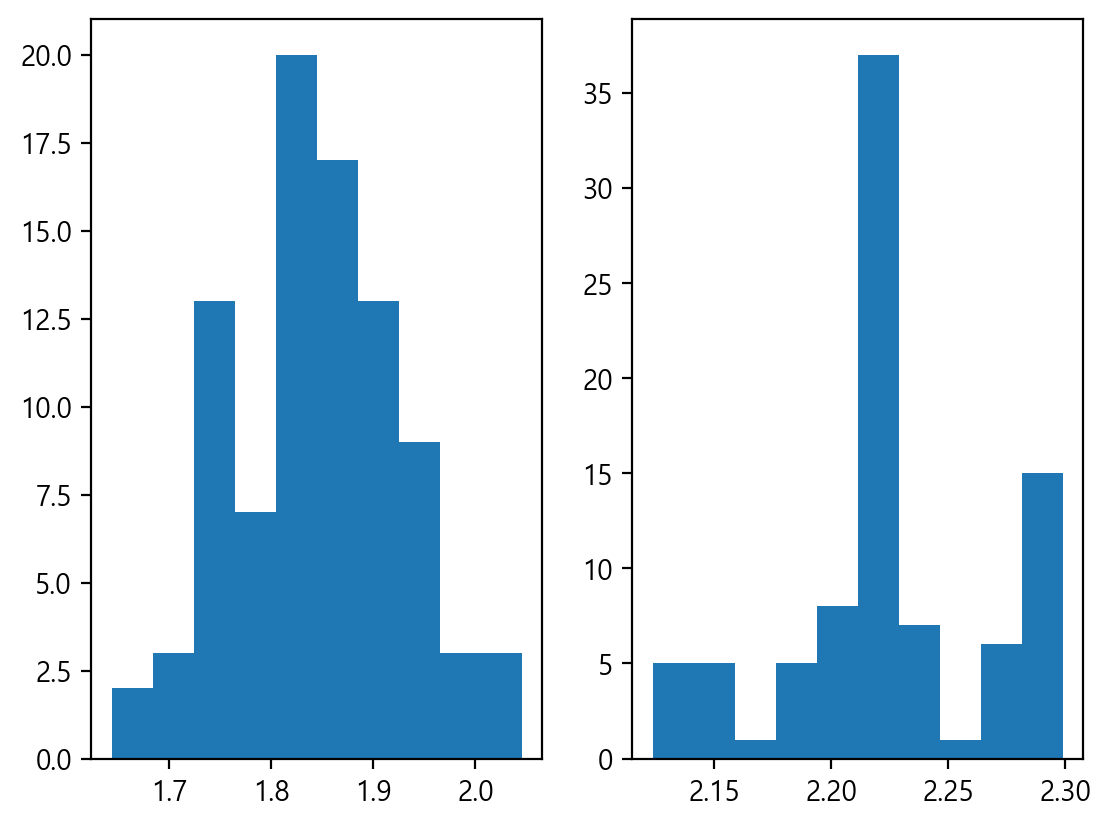

In [43]:
# (1)상용로그+1 : 히스토그램 
weight_log = np.log10(sample_data.filter(['weight_kg'])+1)  # 몸무게가 0인경우 음의 무한대가 되는 것을 방지하기 위해 +1 
height_log = np.log10(sample_data.filter(['height_cm'])+1)  # 키가 0인경우 음의 무한대가 되는 것을 방지하기 위해 +1 

# 키와 몸무게 데이터 세트 
# - 히스토 그램 그리기  
fig, ax = plt.subplots(1,2)
ax[0].hist(pd.DataFrame(weight_log)) 
ax[1].hist(pd.DataFrame(height_log)) 
plt.subplots_adjust(hspace=1)
plt.show()

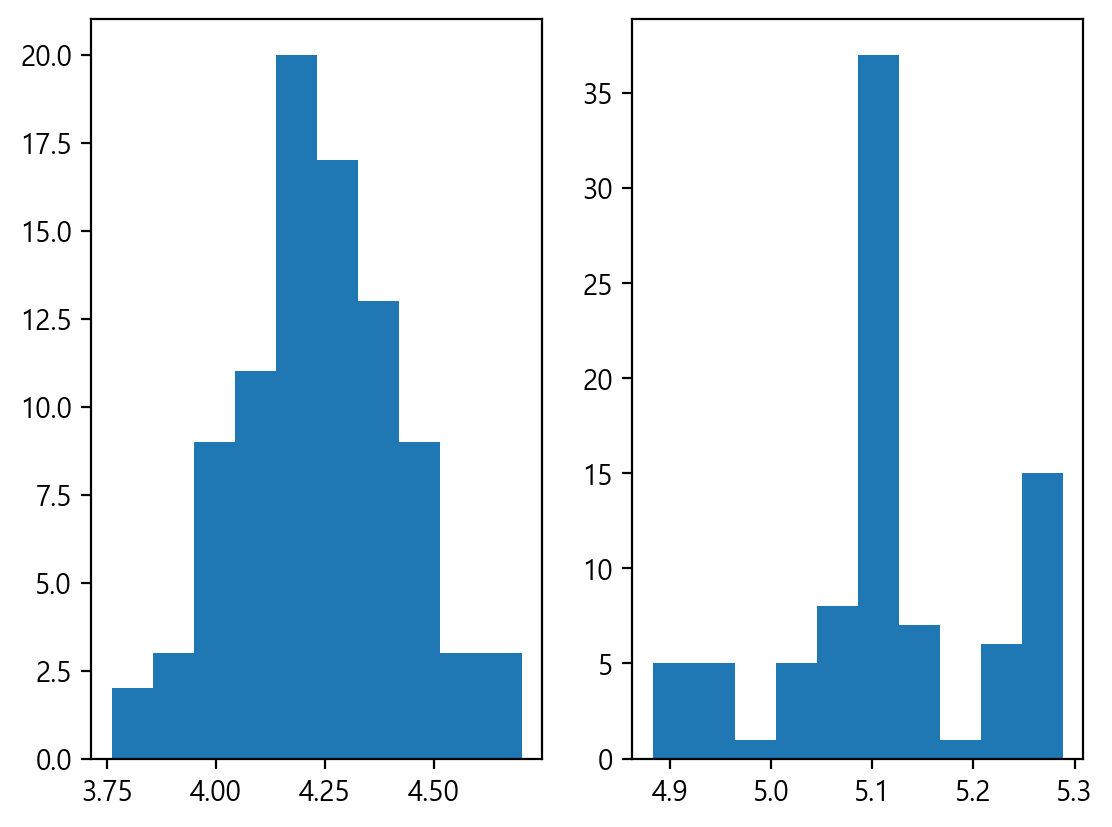

In [44]:
# (2)자연로그 : 히스토그램 
weight_log = np.log(sample_data.filter(['weight_kg']))  # 자연로그  
height_log = np.log(sample_data.filter(['height_cm']))  # 자연로그 

# 키와 몸무게 데이터 세트 
# - 히스토 그램 그리기  
fig, ax = plt.subplots(1,2)
ax[0].hist(pd.DataFrame(weight_log)) 
ax[1].hist(pd.DataFrame(height_log)) 
plt.subplots_adjust(hspace=1)
plt.show()

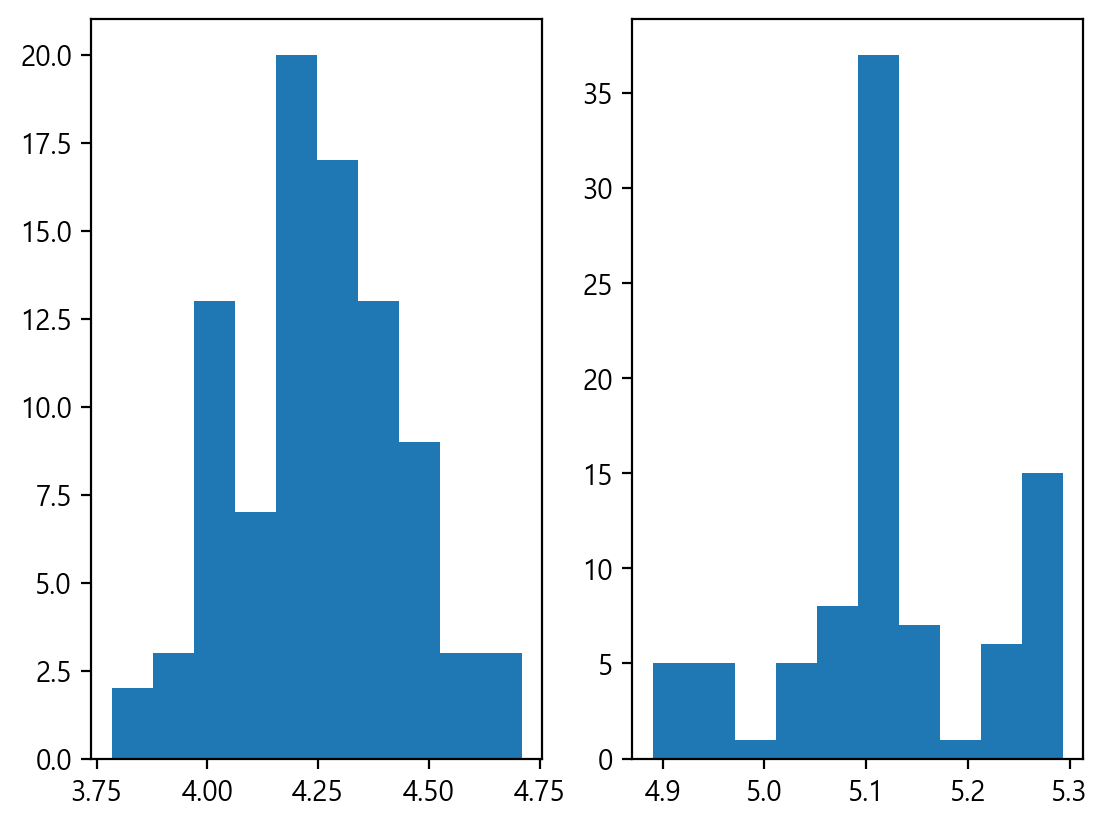

In [45]:
# (3)자연로그+1 : 히스토그램 
weight_log = np.log1p(sample_data.filter(['weight_kg']))  # 자연로그+1  
height_log = np.log1p(sample_data.filter(['height_cm']))  # 자연로그+1 

# 키와 몸무게 데이터 세트 
# - 히스토 그램 그리기  
fig, ax = plt.subplots(1,2)
ax[0].hist(pd.DataFrame(weight_log)) 
ax[1].hist(pd.DataFrame(height_log)) 
plt.subplots_adjust(hspace=1)
plt.show()

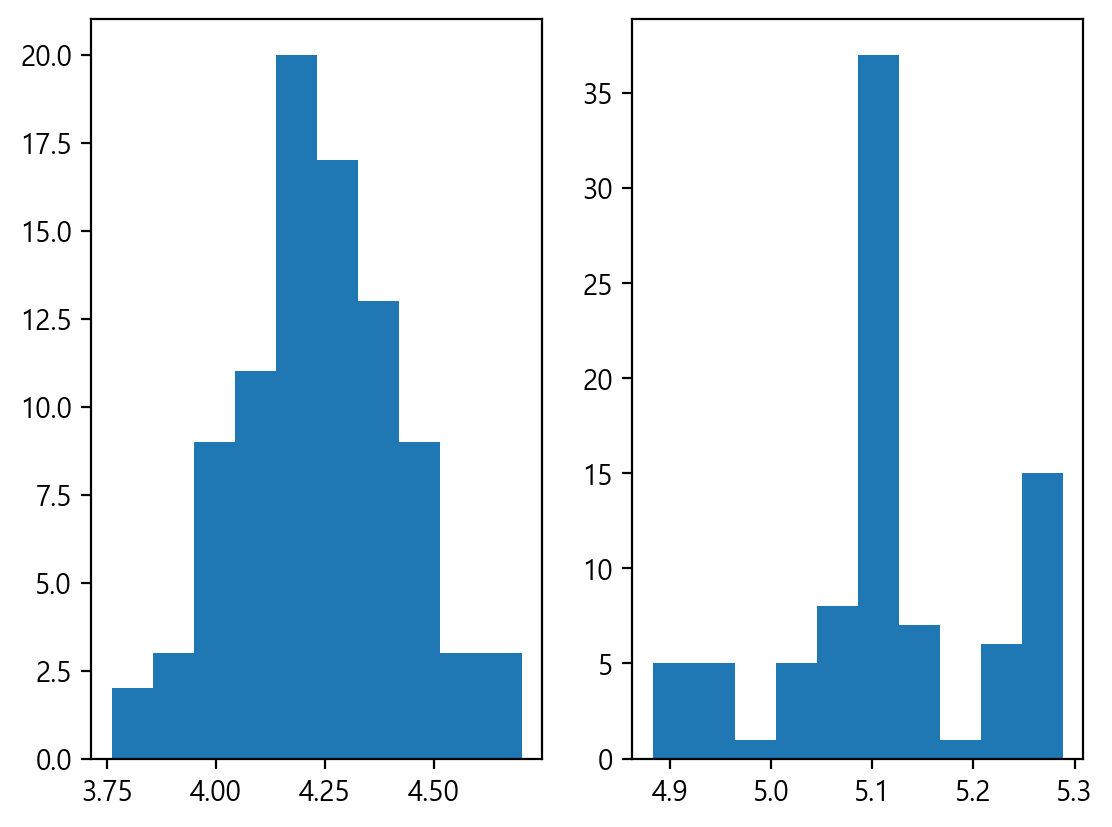

In [46]:
# (4)절대값 자연로그에 원래 부호를 붙임(마이너스인 경우도 사용 가능) : 히스토그램 
weight_log = np.sign(sample_data.filter(['weight_kg'])) * np.log(np.abs(sample_data.filter(['weight_kg']))) # 절대값 자연로그에 원래 부호 붙임   
height_log = np.sign(sample_data.filter(['height_cm'])) * np.log(np.abs(sample_data.filter(['height_cm']))) # 절대값 자연로그에 원래 부호 붙임  

# 키와 몸무게 데이터 세트 
# - 히스토 그램 그리기  
fig, ax = plt.subplots(1,2)
ax[0].hist(pd.DataFrame(weight_log)) 
ax[1].hist(pd.DataFrame(height_log)) 
plt.subplots_adjust(hspace=1)
plt.show()